In [59]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
df = pd.read_excel('lab2.xlsx')

In [26]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [41]:
A = df.iloc[:,1:4]
A

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [15]:
C = df.iloc[:,4:5]
C

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [28]:
A.shape

(10, 4)

In [29]:
C.shape

(10, 1)

In [42]:
np.linalg.matrix_rank(A)

3

In [43]:
np.linalg.matrix_rank(C)

1

In [46]:
X = np.dot(np.linalg.pinv(A), C)
X

array([[ 1.],
       [55.],
       [18.]])

In [49]:
def classifyCust(x):
    if(x > 200):
        return 'RICH'
    else:
        return 'POOR'

In [50]:
df['Purchase Behavior'] = df['Payment (Rs)'].apply(classifyCust)

In [51]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Purchase Behavior
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


In [54]:
df2 = pd.read_excel('lab2.2.xlsx')

In [55]:
df2

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [62]:
df2['Price'].mean()

1560.6634538152612

In [64]:
df2['Price'].var()

58732.36535253922

In [69]:
def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')

In [71]:
df2['Date'] = df2['Date'].apply(mdy_to_ymd)
df2.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,2021-06-29,Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,2021-06-28,Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,2021-06-25,Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,2021-06-24,Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,2021-06-23,Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [73]:
parts = df2["Date"].str.split("-", n = 3, expand = True) 
df2["year"]= parts[0].astype('int') 
df2["month"]= parts[1].astype('int') 
df2["day"]= parts[2].astype('int') 
df2.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%,year,month,day
0,2021-06-29,Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020,2021,6,29
1,2021-06-28,Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043,2021,6,28
2,2021-06-25,Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020,2021,6,25
3,2021-06-24,Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026,2021,6,24
4,2021-06-23,Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023,2021,6,23


In [83]:
df2[df2['Day'] == 'Wed']['Price'].mean()

1550.7060000000001

In [84]:
df2[df2['Month'] == 'Apr']['Price'].mean()

1698.9526315789474

In [100]:
##numOfNegativeChg = (df2['Chg%']<0).sum().sum()
##totalObs = len(df2.index)
##totalObs
numOfNegativeChg = df2['Chg%'].apply(lambda x : 1 if x < 0 else 0).sum()
totalObs = len(df2.index)

In [101]:
probOfLoss = numOfNegativeChg/totalObs
probOfLoss

0.4979919678714859

In [105]:
numOfProfitWed = df2[df2['Day'] == 'Wed']['Chg%'].apply(lambda x : 1 if x > 0 else 0).sum()

In [106]:
probOfProfitWed = numOfProfitWed/totalObs
probOfProfitWed

0.08433734939759036

In [115]:
numOfWed = df2[df2['Day'] == 'Wed']['Chg%'].count()
numOfWed

50

In [116]:
consitionalProb = probOfProfitWed/(numOfWed/totalObs)
consitionalProb

0.42

<Axes: xlabel='Day', ylabel='Chg%'>

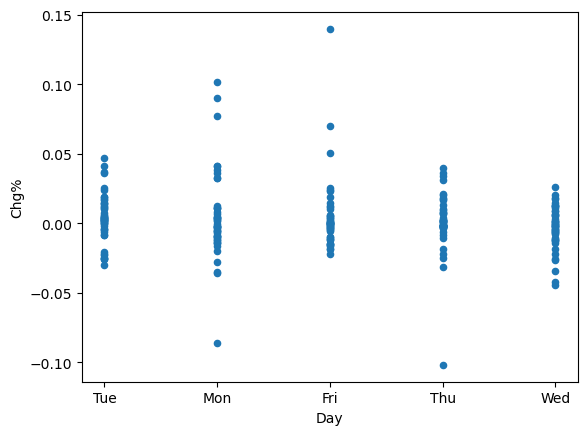

In [120]:
df2.plot.scatter(x = 'Day',
                y = 'Chg%'
                )

In [4]:
df3 = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df3.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S


In [5]:
df3.describe()

,Record ID,age
count,9.172000e+03,9172.000000
mean,8.529473e+08,73.555822
std,7.581969e+06,1183.976718
min,8.408010e+08,1.000000
25%,8.504090e+08,37.000000
50%,8.510040e+08,55.000000
75%,8.607110e+08,68.000000
max,8.701190e+08,65526.000000


In [6]:
df3.dtypes

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [7]:
df3.replace('?', np.nan, inplace=True)
df3.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [8]:
print("Number of missing values in each feature")
missing_values = df3.isnull().sum()
print(missing_values)

Number of missing values in each feature
Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG    


Outliers in Numeric Data:


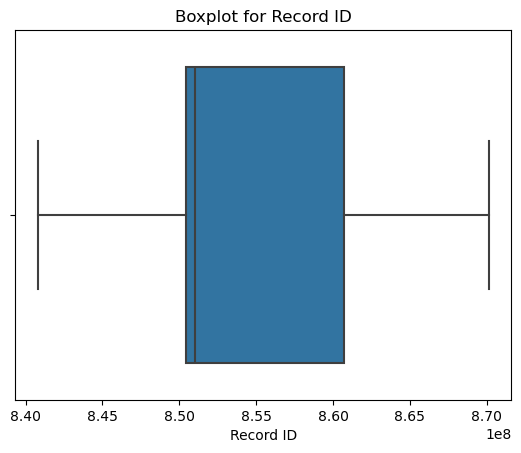

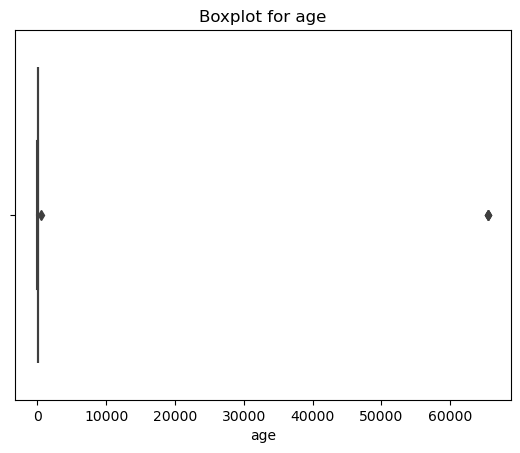

In [9]:
print("\nOutliers in Numeric Data:")
cat_cols = df3.select_dtypes(include=['object']).columns
num_cols = df3.select_dtypes(include=['int64']).columns
for i in num_cols:
    sns.boxplot(x=df3[i])
    plt.title("Boxplot for {}".format(i))
    plt.show()

In [10]:
for i in num_cols:
    print("Mean and std. deviation for", i, "is ", df3[i].mean()," and ", df3[i].std())

Mean and std. deviation for Record ID is  852947346.6122983  and  7581968.780346589
Mean and std. deviation for age is  73.55582206716092  and  1183.9767180444667


In [11]:
for i in num_cols:
    if df3[i].isnull().sum() > 0:
        if df3[i].skew() < 1:
            df3[i].fillna(df3[i].mean(), inplace=True)
            df3("Column: {}, Imputation Method: Mean".format(i))
        else:
            df3[i].fillna(df3[i].median(), inplace=True)
            print("Column: {}, Imputation Method: Median".format(i))

for i in cat_cols:
    if df3[i].isnull().sum() > 0:
        df3[i].fillna(df3[i].mode()[0], inplace=True)
        print("Column: {}, Imputation Method: Mode".format(i))
df3.head()

Column: sex, Imputation Method: Mode


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


In [12]:
scaler = StandardScaler()
df3['age'] = scaler.fit_transform(df3[['age']])
df3['age']

0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64

In [13]:
binary_cols = [col for col in df3.columns if set(df3[col].dropna().unique()) <= {'t', 'f'}]
binary_cols += [col for col in df3.columns if set(df3[col].dropna().unique()) <= {'M', 'F'}]

df3[binary_cols] = df3[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

v1 = df3.loc[0, binary_cols].astype(int)
v2 = df3.loc[1, binary_cols].astype(int)


f11 = np.sum((v1 == 1) & (v2 == 1))
f00 = np.sum((v1 == 0) & (v2 == 0))
f10 = np.sum((v1 == 1) & (v2 == 0))
f01 = np.sum((v1 == 0) & (v2 == 1))

jc = f11 / (f01 + f10 + f11)
jc

0.25

In [14]:
smc = (f11 + f00) / (f00 + f01 + f10 + f11)
smc

0.8571428571428571

In [15]:
vec = df3.iloc[0:2]

In [16]:
vec = vec.select_dtypes(include=[np.number])

In [18]:
df3.loc[df3['sex']=='F','sex',]=1
df3.loc[df3['sex']=='M','sex',]=0

In [19]:
df3

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,-0.037634,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,other,NO CONDITION
1,840801014,-0.037634,0,0,0,0,0,0,0,0,...,1,128.0,0,NaN,0,NaN,0,NaN,other,NO CONDITION
2,840801042,-0.027499,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,11.0,other,NO CONDITION
3,840803046,-0.031722,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,26.0,other,NO CONDITION
4,840803047,-0.035100,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,-0.014829,1,0,0,0,0,0,0,0,...,1,64.0,1,0.83,1,77.0,0,NaN,SVI,NO CONDITION
9168,870119023,-0.043547,1,0,0,0,0,0,0,0,...,1,91.0,1,0.92,1,99.0,0,NaN,SVI,NO CONDITION
9169,870119025,-0.003848,1,0,0,0,0,0,0,0,...,1,113.0,1,1.27,1,89.0,0,NaN,SVI,I
9170,870119027,-0.022431,0,0,0,0,0,0,0,0,...,1,75.0,1,0.85,1,88.0,0,NaN,other,NO CONDITION


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   int64  
 1   age                        9172 non-null   float64
 2   sex                        9172 non-null   int64  
 3   on thyroxine               9172 non-null   int64  
 4   query on thyroxine         9172 non-null   int64  
 5   on antithyroid medication  9172 non-null   int64  
 6   sick                       9172 non-null   int64  
 7   pregnant                   9172 non-null   int64  
 8   thyroid surgery            9172 non-null   int64  
 9   I131 treatment             9172 non-null   int64  
 10  query hypothyroid          9172 non-null   int64  
 11  query hyperthyroid         9172 non-null   int64  
 12  lithium                    9172 non-null   int64  
 13  goitre                     9172 non-null   int64

In [21]:
df3['referral source'].value_counts()

referral source
other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: count, dtype: int64

In [22]:
df3.loc[df3['referral source']=='other','referral source',]=0
df3.loc[df3['referral source']=='SVI','referral source',]=1
df3.loc[df3['referral source']=='SVHC','referral source',]=2
df3.loc[df3['referral source']=='STMW','referral source',]=3
df3.loc[df3['referral source']=='SVHD','referral source',]=4
df3.loc[df3['referral source']=='WEST','referral source',]=5

In [23]:
df3.value_counts()

Record ID  age        sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  query hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH measured  TSH     T3 measured  T3   TT4 measured  TT4    T4U measured  T4U   FTI measured  FTI    TBG measured  TBG   referral source  Condition   
840827019  -0.028343  0    0             0                   0                          0     0         0                0               0                  0                   0        0       0      0              0      1             70.000  1            0.4  1             3.9    1             0.83  1             5.0    1             28.0  0                F               1
860806041  -0.023275  0    0             0                   0                          0     0         0                0               0                  0                   0        0       0      0              0      1             27.000  1  

In [24]:
df3['Condition'].value_counts()

Condition
NO CONDITION    6771
K                436
G                359
I                346
F                233
R                196
A                147
L                115
M                111
N                110
S                 85
GK                49
AK                46
J                 30
B                 21
MK                16
Q                 14
O                 14
C|I               12
KJ                11
GI                10
H|K                8
D                  8
FK                 6
C                  6
P                  5
MI                 2
LJ                 1
GKJ                1
OI                 1
D|R                1
E                  1
Name: count, dtype: int64

In [26]:
labelencoder = LabelEncoder()
df3['Condition'] = labelencoder.fit_transform(df3['Condition'])

In [27]:
df3.drop(columns=['Condition'],inplace=True)

In [28]:
condition = pd.read_excel("Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')['Condition']

In [29]:
condition

0       NO CONDITION
1       NO CONDITION
2       NO CONDITION
3       NO CONDITION
4                  S
            ...     
9167    NO CONDITION
9168    NO CONDITION
9169               I
9170    NO CONDITION
9171    NO CONDITION
Name: Condition, Length: 9172, dtype: object

In [43]:
df3['Condition'] = condition
df3.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,-0.037634,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NO CONDITION
1,840801014,-0.037634,0,0,0,0,0,0,0,0,...,1,128.0,0,NaN,0,NaN,0,NaN,0,NO CONDITION
2,840801042,-0.027499,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,11.0,0,NO CONDITION
3,840803046,-0.031722,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,26.0,0,NO CONDITION
4,840803047,-0.035100,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,36.0,0,S


In [32]:
df3['Condition'] = labelencoder.fit_transform(df3['Condition'])

In [33]:
df3['Condition'].value_counts()

Condition
25    6771
17     436
10     359
15     346
8      233
30     196
0      147
19     115
21     111
24     110
31      85
12      49
1       46
16      30
2       21
23      16
29      14
26      14
4       12
18      11
11      10
14       8
5        8
9        6
3        6
28       5
22       2
20       1
13       1
27       1
6        1
7        1
Name: count, dtype: int64

In [34]:
vect2 = df3.iloc[0:2]

In [35]:
vect2 = vect2.select_dtypes(include=[np.number])

In [37]:
vect2

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,Condition
0,840801013,-0.037634,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,25
1,840801014,-0.037634,0,0,0,0,0,0,0,0,...,1.9,1,128.0,0,NaN,0,NaN,0,NaN,25


In [38]:
AB = 0
for i in range(len(vect2.columns)):
    AB += vect2.iloc[0,i]*vect2.iloc[1,i]

In [39]:
AB

nan

In [41]:
cos = AB/(np.linalg.norm(vect2.iloc[0])*np.linalg.norm(vect2.iloc[1]))

In [42]:
cos

nan

In [91]:
##Using MinMaxScaler instead of StandardScalar

In [46]:
medData = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
medData

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,NO CONDITION


In [47]:
medData['sex'].value_counts()

sex
F    6073
M    2792
?     307
Name: count, dtype: int64

In [48]:
medData.info

<bound method DataFrame.info of       Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2         

In [49]:
for i in medData.columns[3:29]:
    medData.loc[medData[i] == 'f', i,] = 0
    medData.loc[medData[i] == 't', i,] = 1
    medData.loc[medData[i] == '?', i,] = np.nan

In [50]:
medData.loc[medData["Condition"] == 'NO CONDITION', "Condition",] = 0
medData.loc[medData["Condition"] == 'S', "Condition",] = 1

In [51]:
medData.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,other,0
1,840801014,29,F,0,0,0,0,0,0,0,...,1,128,0,NaN,0,NaN,0,NaN,other,0
2,840801042,41,F,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,11,other,0
3,840803046,36,F,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,26,other,0
4,840803047,32,F,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,36,other,1


<Axes: xlabel='TSH'>

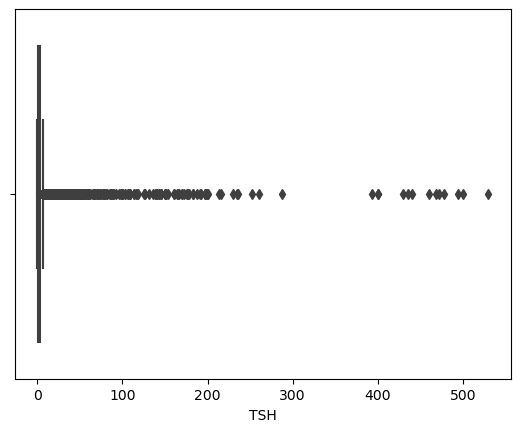

In [52]:
sns.boxplot(x=medData['TSH'])

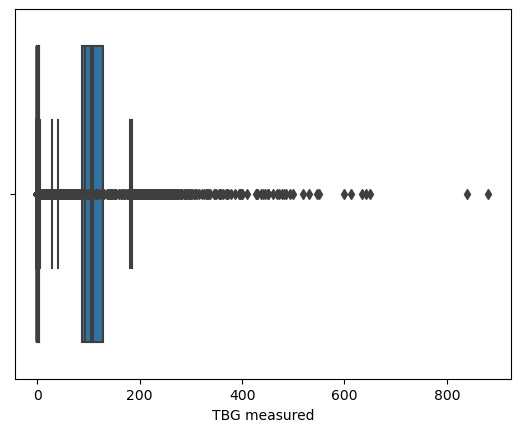

In [53]:
for i in medData.columns[3:28]:
    sns.boxplot(x=medData[i])

<Axes: xlabel='Record ID'>

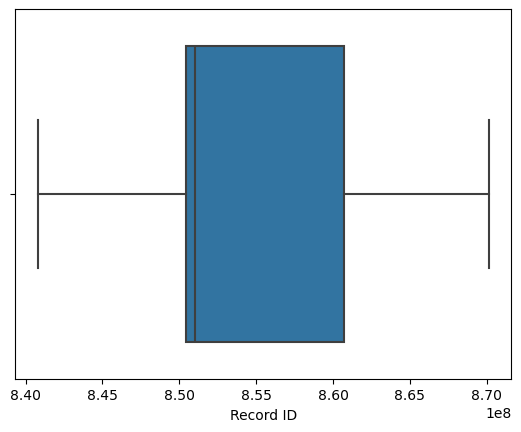

In [54]:
sns.boxplot(x=medData['Record ID'])

<Axes: xlabel='age'>

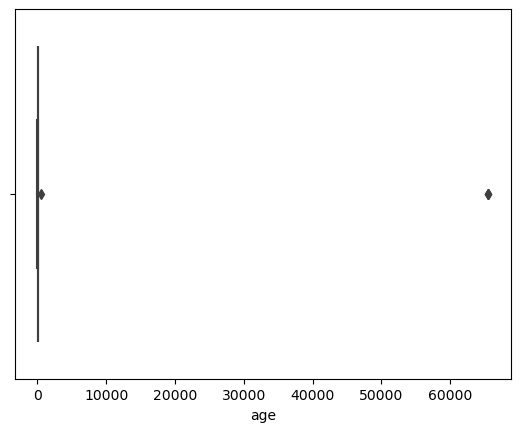

In [55]:
sns.boxplot(x=medData['age'])

In [56]:
medData['age'].fillna(medData['age'].median(), inplace=True)
medData['Record ID'].fillna(medData['Record ID'].mean(), inplace=True)
for i in medData.columns[3:29]:
    medData[i].fillna(medData[i].median(), inplace=True)
categorial_data = ['sex','referral source','Condition']
for i in categorial_data:
    medData[i].fillna(medData[i].mode()[0], inplace=True)
medData.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,0,26.0,other,0
1,840801014,29,F,0,0,0,0,0,0,0,...,1,128.0,0,0.96,0,109.0,0,26.0,other,0
2,840801042,41,F,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,1,11.0,other,0
3,840803046,36,F,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,1,26.0,other,0
4,840803047,32,F,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,1,36.0,other,1


In [60]:
scaler = MinMaxScaler()

In [62]:
numeric_columns = medData.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')

In [64]:
medData[numeric_columns] = scaler.fit_transform(medData[numeric_columns])
medData.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,0,0.129565,other,0
1,3.410871e-08,0.000427,F,0,0,0,0,0,0,0,...,1,0.210702,0,0.365741,0,0.122328,0,0.129565,other,0
2,9.891527e-07,0.000610,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.054527,other,0
3,6.934301e-05,0.000534,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.129565,other,0
4,6.937712e-05,0.000473,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.179590,other,1


In [65]:
new_vec = medData.iloc[0:2,3:28]

In [66]:
new_vec = new_vec.to_numpy()
new_vec[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0.0005566090246134398,
       0, 0.10306406685236767, 0, 0.1705685618729097, 0,
       0.36574074074074064, 0, 0.12232833105957254, 0], dtype=object)

In [67]:
f11=0
for i in range(len(new_vec[0])):
    if(new_vec[0][i] == 1):
        if(new_vec[1][i] == 1):
            f11 +=1
f00=0
for i in range(len(new_vec[0])):
    if(new_vec[0][i] == 0):
        if(new_vec[1][i] == 0):
            f00 +=1

f01 = 0
for i in range(len(new_vec[0])):
    if(new_vec[0][i] == 0):
        if(new_vec[1][i] == 1):
            f01 +=1

f10 = 0
for i in range(len(new_vec[0])):
    if(new_vec[0][i] == 1):
        if(new_vec[1][i] == 0):
            f10 +=1

In [68]:
jc = f11/(f11+f10+f01)
jc

0.25

In [69]:
smc = (f11+f00)/(f11+f10+f01+f00)
smc

0.85

In [70]:
vec2 = medData.iloc[0:2]
vec2 = vec2.select_dtypes(include=[np.number])
medData.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,0,0.129565,other,0
1,3.410871e-08,0.000427,F,0,0,0,0,0,0,0,...,1,0.210702,0,0.365741,0,0.122328,0,0.129565,other,0
2,9.891527e-07,0.000610,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.054527,other,0
3,6.934301e-05,0.000534,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.129565,other,0
4,6.937712e-05,0.000473,F,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.179590,other,1


In [71]:
medData.loc[medData['sex']=='F','sex',]=1
medData.loc[medData['sex']=='M','sex',]=0
medData.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,0,0.129565,other,0
1,3.410871e-08,0.000427,1,0,0,0,0,0,0,0,...,1,0.210702,0,0.365741,0,0.122328,0,0.129565,other,0
2,9.891527e-07,0.000610,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.054527,other,0
3,6.934301e-05,0.000534,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.129565,other,0
4,6.937712e-05,0.000473,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.179590,other,1


In [72]:
medData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   float64
 1   age                        9172 non-null   float64
 2   sex                        9172 non-null   object 
 3   on thyroxine               9172 non-null   object 
 4   query on thyroxine         9172 non-null   object 
 5   on antithyroid medication  9172 non-null   object 
 6   sick                       9172 non-null   object 
 7   pregnant                   9172 non-null   object 
 8   thyroid surgery            9172 non-null   object 
 9   I131 treatment             9172 non-null   object 
 10  query hypothyroid          9172 non-null   object 
 11  query hyperthyroid         9172 non-null   object 
 12  lithium                    9172 non-null   object 
 13  goitre                     9172 non-null   objec

In [73]:
medData['referral source'].value_counts()

referral source
other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: count, dtype: int64

In [74]:
medData.loc[medData['referral source']=='other','referral source',]=0
medData.loc[medData['referral source']=='SVI','referral source',]=1
medData.loc[medData['referral source']=='SVHC','referral source',]=2
medData.loc[medData['referral source']=='STMW','referral source',]=3
medData.loc[medData['referral source']=='SVHD','referral source',]=4
medData.loc[medData['referral source']=='WEST','referral source',]=5


In [75]:
medData.value_counts()

Record ID  age       sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  query hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH measured  TSH       T3 measured  T3        TT4 measured  TT4       T4U measured  T4U       FTI measured  FTI       TBG measured  TBG       referral source  Condition
0.000000   0.000427  1    0             0                   0                          0     0         0                0               1                  0                   0        0       0      0              0      1             0.000557  0            0.103064  0             0.170569  0             0.365741  0             0.122328  0             0.129565  0                0            1
0.665462   0.000702  1    0             0                   0                          0     0         0                0               0                  0                   0        0       0      0             

In [76]:
medData['Condition'].value_counts()

Condition
0      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
1        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: count, dtype: int64

In [77]:
condition = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")["Condition"]
medData["Condition"]=condition
medData

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,0,0.129565,0,NO CONDITION
1,3.410871e-08,0.000427,1,0,0,0,0,0,0,0,...,1,0.210702,0,0.365741,0,0.122328,0,0.129565,0,NO CONDITION
2,9.891527e-07,0.000610,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.054527,0,NO CONDITION
3,6.934301e-05,0.000534,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.129565,0,NO CONDITION
4,6.937712e-05,0.000473,1,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.179590,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,9.999996e-01,0.000839,0,0,0,0,0,0,0,0,...,1,0.103679,1,0.305556,1,0.085948,0,0.129565,1,NO CONDITION
9168,9.999996e-01,0.000320,0,0,0,0,0,0,0,0,...,1,0.148829,1,0.347222,1,0.110960,0,0.129565,1,NO CONDITION
9169,9.999997e-01,0.001038,0,0,0,0,0,0,0,0,...,1,0.185619,1,0.509259,1,0.099591,0,0.129565,1,I
9170,9.999997e-01,0.000702,1,0,0,0,0,0,0,0,...,1,0.122074,1,0.314815,1,0.098454,0,0.129565,0,NO CONDITION


In [78]:
labelencoder = LabelEncoder()

In [79]:
medData['Condition'] = labelencoder.fit_transform(medData['Condition'])

In [80]:
vec2 = medData.iloc[0:2]
vec2 = vec2.select_dtypes(include=[np.number])
vec2

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG,Condition
0,0.000000e+00,0.000427,0.000557,0.103064,0.170569,0.365741,0.122328,0.129565,25
1,3.410871e-08,0.000427,0.003009,0.103064,0.210702,0.365741,0.122328,0.129565,25


In [81]:
AB = 0
for i in range(len(vec2.columns)):
    AB += vec2.iloc[0,i]*vec2.iloc[1,i]
AB

625.2120807977351

In [82]:
cos = AB/(np.linalg.norm(vec2.iloc[0])*np.linalg.norm(vec2.iloc[1]))
cos

0.9999987071259869

In [83]:
vec20 = medData.iloc[0:20]

In [84]:
def JC(vec):
    f11=0
    for i in range(len(vec.columns)):
        if(vec.iloc[0,i] == 1):
            if(vec.iloc[1,i] == 1):
                f11 +=1
    f00=0
    for i in range(len(vec.columns)):
        if(vec.iloc[0,i] == 0):
            if(vec.iloc[1,i] == 0):
                f00 +=1
    f01 = 0
    for i in range(len(vec.columns)):
        if(vec.iloc[0,i] == 0):
            if(vec.iloc[1,i] == 1):
                f01 +=1
    f10 = 0
    for i in range(len(vec.columns)):
        if(vec.iloc[0,i] == 1):
            if(vec.iloc[1,i] == 0):
                f10 +=1
    jc = f11/(f11+f10+f01)
    smc = (f11+f00)/(f11+f10+f01+f00)
    return jc,smc
    

In [85]:
jc2,smc2 = JC(vec20)
print(jc2)
print(smc2)

0.4
0.8636363636363636


In [86]:
def cosine(vec):
    vec = vec.select_dtypes(include=[np.number])
    AB = 0
    for i in range(len(vec.columns)):
        AB += vec.iloc[0,i]*vec.iloc[1,i]
    cos = AB/(np.linalg.norm(vec.iloc[0])*np.linalg.norm(vec.iloc[1]))
    return cos

In [87]:
cos

0.9999987071259869

C:\Users\abhin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

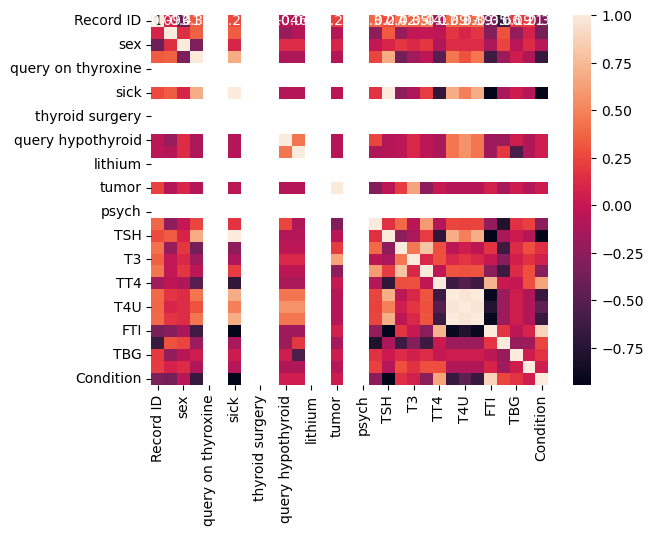

In [90]:
sns.heatmap(vec20.corr(),annot=True)